In [1]:
from Embedtest import OASDBDesc
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import ablang
from sklearn.preprocessing import StandardScaler

2023-04-24 16:38:56 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [2]:
#!pip install ablang

In [3]:
ls ../Desktop/

merck/


In [4]:
!pwd

/Users/cherylliu/Desktop/ds_discovery/MerckEDA-main/EmbedTest


In [5]:
!ls PATH_TO_GZ_FILE_IS

ls: PATH_TO_GZ_FILE_IS: No such file or directory


In [6]:
# obj_oasdb = OASDBDesc()
# big_df = obj_oasdb.read_data("/Users/cherylliu/Desktop/ds_discovery/datasets")

In [7]:
# sampled_df = big_df.sample(2000)
# sampled_df

In [8]:
#sampled_df.to_csv('sampled_df_2000.csv', index = False)

In [9]:
#obj_oasdb.perform_random_sample(big_df, 10, 2000)

In [10]:
obj_oasdb = OASDBDesc()
sampled_df = pd.read_csv("/Users/cherylliu/Desktop/ds_discovery/sampled_df_2000.csv")
sampled_df

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AGTCTTTAGCCGGTAA-1_contig_1,CTGGTAAACTCTTCATATTTCTTATATGGGGCCCATCCTCTTCTCA...,H,F,T,NaN,T,F,NaN,IGHV2-9-1*01,...,402.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
1,CGGGTCAGTAATCACC-1_contig_2,AGCTCTGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCAC...,H,F,T,F,T,F,F,IGHV3-21*01,...,388.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
2,GTAACGTTCACAGTAC-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,H,F,T,F,T,F,T,IGHV3-23*04,...,395.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
3,CGCTGGATCGTGGGAA-1_contig_1,AGTCCTGGACTCTGAGGTTCGCCCACTCAGTAATCAGTACTGCAGC...,H,F,T,NaN,T,F,NaN,IGHV5-25*01,...,375.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"{'fwk1': {'1 ': 'D', '2 ': 'T', '3 ': 'V', '4 ...",|||||
4,CCTAGCTCACCCAGTG-1_contig_2,CGAGCCCAGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCAGC...,H,F,T,F,T,F,T,IGHV3-30*04,...,405.0,G,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'V', '3 ': 'V', '4 ...",|||||
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,GGTGCGTGTGCGAAAC-1_contig_2,TGGGGCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGC...,H,F,T,F,T,F,T,IGHV4-39*01,...,418.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'T', '3 ': 'V', '4 ...",|||||
1996,CAAGTTGCAGACAGGT-1_contig_1,ACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATCT...,H,F,T,F,T,F,T,IGHV4-61*02,...,404.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
1997,AGCGTATTCTTCGGTC-1_contig_1,ACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATCT...,H,F,T,F,T,F,T,IGHV4-61*02,...,627.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1998,ACGTCAACACATTCGA-1_contig_1,CCACATCCCTCCTCAGAAGCCCCCAGAGCACAACTCCTTACCATGG...,H,F,T,F,T,F,T,IGHV1-3*01,...,480.0,T,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||


## physchemvh_gen Clustering

In [11]:
heavy_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_heavy")

In [12]:
heavy_chain

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,6.0,2.0,4.0,2.0,3.0,12.0,0.0,4.0,6.0,10.0,...,18.0,9.0,9.0,4.0,9.0,32.0,15.0,43.0,15.0,-0.220000
1,7.0,2.0,5.0,5.0,5.0,17.0,1.0,3.0,4.0,10.0,...,14.0,7.0,12.0,4.0,9.0,37.0,17.0,37.0,23.0,-0.232174
2,9.0,2.0,4.0,5.0,3.0,15.0,0.0,3.0,2.0,12.0,...,18.0,8.0,8.0,4.0,7.0,35.0,12.0,39.0,17.0,-0.165217
3,9.0,2.0,4.0,4.0,3.0,10.0,0.0,3.0,6.0,9.0,...,16.0,9.0,9.0,5.0,8.0,33.0,16.0,38.0,20.0,-0.246957
4,9.0,2.0,8.0,3.0,4.0,13.0,1.0,2.0,5.0,8.0,...,15.0,7.0,12.0,5.0,8.0,35.0,16.0,36.0,25.0,-0.370435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.0,2.0,4.0,3.0,1.0,11.0,1.0,5.0,4.0,12.0,...,21.0,11.0,10.0,4.0,11.0,34.0,17.0,41.0,19.0,-0.140870
1996,6.0,2.0,3.0,3.0,2.0,13.0,0.0,5.0,5.0,9.0,...,21.0,11.0,9.0,4.0,6.0,31.0,10.0,44.0,15.0,-0.260000
1997,6.0,2.0,4.0,3.0,2.0,12.0,0.0,5.0,5.0,9.0,...,21.0,11.0,9.0,5.0,9.0,31.0,14.0,44.0,16.0,-0.300870
1998,10.0,2.0,3.0,4.0,2.0,10.0,1.0,2.0,6.0,5.0,...,14.0,10.0,10.0,5.0,7.0,29.0,15.0,40.0,20.0,-0.460000


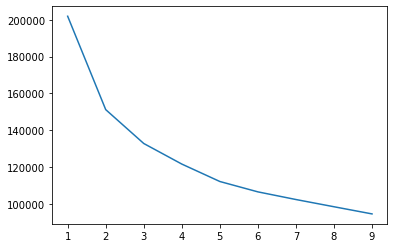

In [13]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

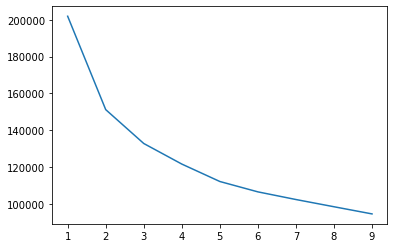

In [14]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

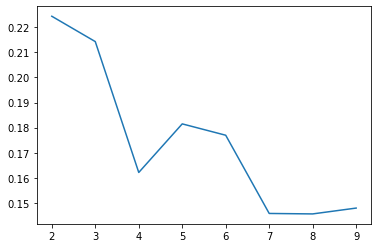

In [15]:
plt.plot(obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[1])

## physchemvh_gen PCA

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

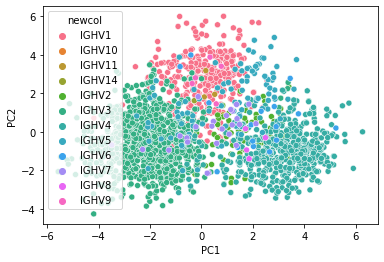

In [16]:
pca1 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['v_call_heavy']], 'v_call_heavy' )
sns.scatterplot(data = pca1, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

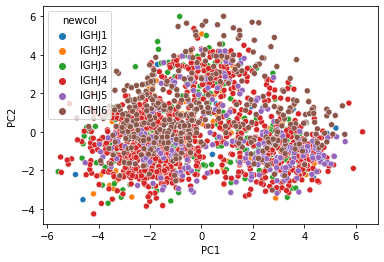

In [17]:
pca2 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['j_call_heavy']], 'j_call_heavy' )
sns.scatterplot(data = pca2, x = 'PC1', y = 'PC2', hue = 'newcol')

In [18]:
light_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_light")
light_chain.head()

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,3.0,2.0,6.0,3.0,3.0,10.0,1.0,7.0,4.0,10.0,...,15.0,12.0,3.0,2.0,6.0,26.0,9.0,42.0,18.0,-0.402609
1,4.0,2.0,6.0,2.0,4.0,11.0,2.0,7.0,4.0,7.0,...,13.0,11.0,5.0,1.0,6.0,27.0,8.0,40.0,16.0,-0.355652
2,8.0,2.0,1.0,5.0,4.0,11.0,0.0,5.0,2.0,8.0,...,15.0,11.0,5.0,2.0,5.0,30.0,8.0,39.0,14.0,-0.229565
3,9.0,2.0,6.0,4.0,4.0,9.0,1.0,3.0,5.0,8.0,...,12.0,9.0,6.0,2.0,5.0,30.0,8.0,34.0,19.0,-0.363478
4,2.0,2.0,6.0,3.0,4.0,11.0,1.0,4.0,4.0,8.0,...,15.0,8.0,9.0,2.0,5.0,27.0,9.0,38.0,21.0,-0.466087


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

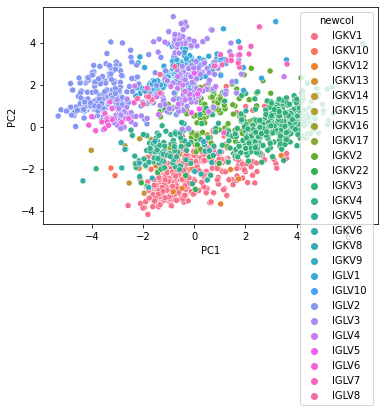

In [19]:
pca1_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = pca1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

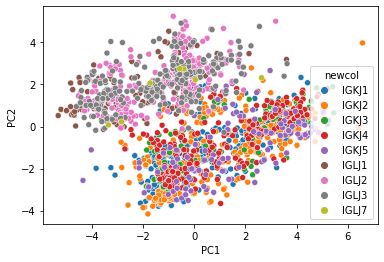

In [20]:
pca2_light = obj_oasdb.pca_analysis(light_chain,sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = pca2_light, x = 'PC1', y = 'PC2', hue = 'newcol')

## ablang PCA

In [21]:
#ablang_encode_seq
seqs_light, seqs_heavy = obj_oasdb.ablang_encode_seq(sampled_df)

In [22]:
seqs_light = pd.DataFrame(seqs_light)

In [23]:
seqs_heavy = pd.DataFrame(seqs_heavy)
seqs_heavy

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.617900,-0.167541,-0.835314,-0.283977,-0.107897,0.836250,0.538717,0.097990,-0.223519,-0.638774,...,0.261895,0.721501,0.418347,0.302812,-0.936084,0.579339,0.218393,-0.634670,0.360467,0.556464
1,0.046128,0.249407,-0.886734,0.230833,0.297872,0.404024,0.450811,0.206065,-0.103488,-0.533983,...,0.492174,0.067331,0.161772,0.441188,-0.863086,0.358675,0.475931,-0.571159,-0.055006,0.892195
2,-0.919004,0.251117,-0.815416,-0.167931,0.101843,0.557501,-0.024806,-0.407058,-0.367131,-0.009658,...,-0.199204,0.644360,0.031179,0.132750,-0.568703,-0.064865,-0.052042,-0.229691,0.524597,0.835069
3,-0.884223,0.136148,-0.344668,-0.165263,-0.288966,0.735483,0.578179,-0.403927,-0.518597,0.273754,...,0.055138,0.678309,0.069717,0.279769,-0.622723,0.148812,-0.153516,0.052988,0.549313,0.730378
4,-0.367093,0.230011,-1.005832,0.290665,-0.222477,0.482852,0.217141,-0.223284,-0.078678,-0.196560,...,0.006606,-0.149345,-0.032146,0.278975,-0.486759,0.474604,0.168484,-0.440622,0.456707,1.136627
5,-0.262703,-0.237232,-0.836650,-0.155247,-0.261031,0.711700,0.432913,0.011887,0.055592,-0.685307,...,-0.000222,-0.173354,-0.019893,-0.057162,-0.613193,0.124468,0.683462,-0.642635,0.413718,0.506364
6,-0.775212,0.155028,-0.472303,0.075969,0.003115,0.910831,0.720030,-0.196992,-0.457026,0.409354,...,0.041378,0.559627,-0.111536,0.167753,-0.599065,0.140678,-0.338738,-0.169941,0.691101,0.626431
7,-0.135212,-0.071977,-0.905183,0.710913,-0.511384,0.034627,0.406579,0.202240,-0.426001,-0.018789,...,-0.221749,-0.381967,-0.088578,0.288072,-0.411786,0.387386,-0.142058,-0.558782,-0.115152,0.944746
8,-0.446008,0.286311,-0.525125,-0.108960,-0.033819,0.865214,0.668981,0.024586,-0.613691,0.230200,...,0.368187,0.255832,-0.361960,0.267628,-0.337788,-0.015875,-0.040726,0.072489,0.572666,0.498595
9,-0.737769,0.438835,-0.438018,-0.173730,0.038800,0.766459,0.709144,-0.283054,-0.219937,0.199372,...,0.368211,0.374694,-0.276656,0.477704,-0.582575,-0.165239,-0.383923,-0.081119,0.474794,0.721418


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

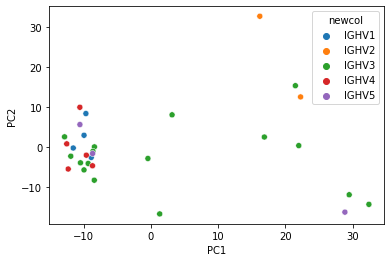

In [24]:
pca1_ablang_heavy = obj_oasdb.pca_analysis(seqs_heavy,sampled_df[['v_call_heavy']], 'v_call_heavy' )
sns.scatterplot(data = pca1_ablang_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

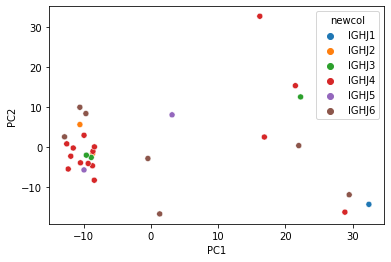

In [25]:
pca2_ablang_heavy = obj_oasdb.pca_analysis(seqs_heavy,sampled_df[['j_call_heavy']], 'j_call_heavy' )
sns.scatterplot(data = pca2_ablang_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

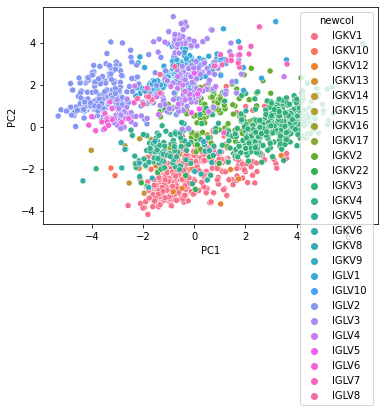

In [26]:
pca1_ablang_light = obj_oasdb.pca_analysis(seqs_light, sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = pca1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

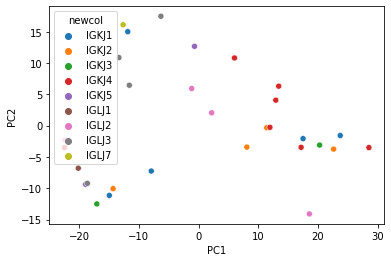

In [27]:
pca2_ablang_light = obj_oasdb.pca_analysis(seqs_light,sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = pca2_ablang_light, x = 'PC1', y = 'PC2', hue = 'newcol')

## physchemvh_gen tsne

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

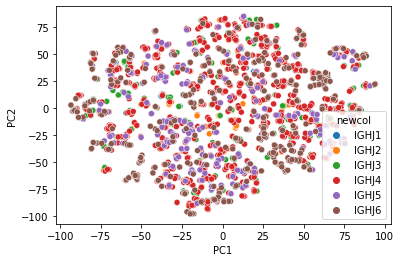

In [28]:
tsne1_heavy = obj_oasdb.tsne_analysis(heavy_chain, sampled_df[['j_call_heavy']], 'j_call_heavy')
sns.scatterplot(data = tsne1_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

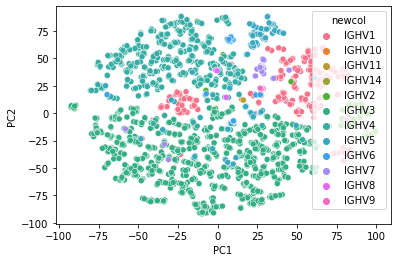

In [29]:
tsne2_heavy = obj_oasdb.tsne_analysis(heavy_chain, sampled_df[['v_call_heavy']], 'v_call_heavy')
sns.scatterplot(data = tsne2_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

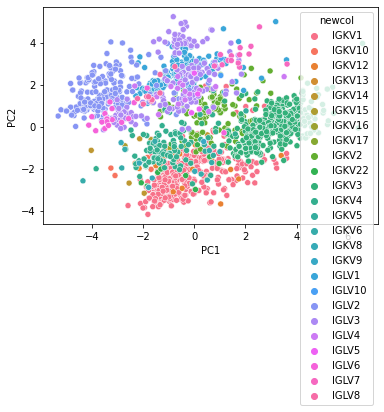

In [30]:
tsne1_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = tsne1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

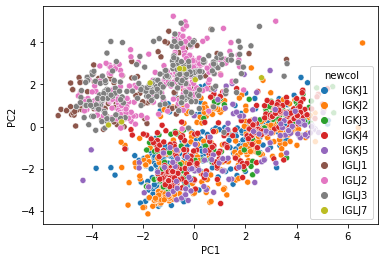

In [31]:
tsne2_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = tsne2_light, x = 'PC1', y = 'PC2', hue = 'newcol')